In [1]:
import numpy as np
from brian2 import *
from random import randrange
from collections import Counter
import math

In [2]:
def pulse_input_current_generator(max_I,delta_time,duration,possibility):
    output = TimedArray([np.random.choice([max_I,0],p=[possibility,1 - possibility]) * namp for i in range(int(duration/delta_time))],delta_time)
    return output

In [114]:
def simulate(duration = 100 * ms , Resistance_1 = 4 * Mohm , Resistance_2 = 5 * Mohm , I_1 = 14 , I_2 = 9 , initial_w = 0.5 , Apre = 0.1,
            p_1 = 0.5 , p_2 = 0.3 , tau_1 = 6*ms , tau_2 = 8*ms , 
             u_rest_1 = -72 * mV , u_rest_2 = -68 * mV , threshold_1 = -54 * mV , threshold_2 = -55 * mV):
    
    start_scope()
    delta_time = 1 * ms
    wmax = 1
    Apost = -Apre * tau_1 / tau_2 * 1.04
    
    input_current_1 = pulse_input_current_generator(I_1 , delta_time , duration , p_1)
    input_current_2 = pulse_input_current_generator(I_2 , delta_time , duration , p_2)
    
    eqs_1 = '''
        du/dt = -(u-u_rest_1)/tau + Resistance_1 * input_current_1(t)/tau : volt
        tau : second
    '''
    neuron_1 = NeuronGroup(1,eqs_1,threshold='u>threshold_1', reset='u=u_rest_1',method='linear')
    neuron_1.u = u_rest_1
    neuron_1.tau = tau_1
    
    eqs_2 = '''
        du/dt = -(u-u_rest_2)/tau + Resistance_2 * input_current_2(t)/tau : volt
        tau : second
    '''
    neuron_2 = NeuronGroup(1,eqs_2,threshold='u>threshold_2', reset='u=u_rest_2',method='linear')
    neuron_2.u = u_rest_2
    neuron_2.tau = tau_2
    
    syn = Synapses(neuron_1 , neuron_2 ,'''
             w : 1
             dapre/dt = -apre/tau_1 : 1 (clock-driven)
             dapost/dt = -apost/tau_2 : 1 (clock-driven)
             ''' ,
             on_pre= '''
             u_post += w * mV
             apre += Apre
             w = clip(w+apost, 0, wmax) 
             ''' ,
             on_post='''
             apost += Apost
             w = clip(w+apre, 0, wmax)
             ''')
    
    syn.connect(i=0 , j=0)
    syn.w = initial_w
    
    
    M = StateMonitor(syn, ['w', 'apre', 'apost'], record=True)
    s1 = SpikeMonitor(neuron_1)
    s2 = SpikeMonitor(neuron_2)
    
    run(duration)
    
    pre = [x/ms for x in list(s1.all_values()['t'][0])]
    post = [x/ms for x in list(s2.all_values()['t'][0])]
    wlist = M.w[0]
    
    x = []
    y = []

    for i in pre:
        to_check = []
        for j in post:
            if j<i:
                to_check.append(j)
        if len(to_check) == 0:
            continue
        else:
            x.append(i - max(to_check))
            y.append(wlist[int(i*10)+1] - wlist[int(i*10)])
            
    for i in post:
        to_check = []
        for j in pre:
            if j<i:
                to_check.append(j)
        if len(to_check) == 0:
            continue
        else:
            x.append(max(to_check) - i)
            y.append(wlist[int(i*10)+1] - wlist[int(i*10)])
        

        
    fig = plt.figure(figsize=(8, 8) , constrained_layout=True)
    gs = fig.add_gridspec(3, 4)
    axs0 = fig.add_subplot(gs[0, :])
    axs1 = fig.add_subplot(gs[1, :])
    axs2 = fig.add_subplot(gs[2, :])

    axs0.plot(M.t/ms, M.apre[0], label='apre')
    axs0.plot(M.t/ms, M.apost[0], label='apost')
    axs0.axhline(color='red')
    axs0.legend()
    
    axs1.plot(M.t/ms, M.w[0], label='w')
    legend(loc='best')
    xlabel('Time (ms)')
    ylabel('W (mV)')
    
    axs2.scatter(x,y)
    xlabel('Delta Time (ms)')
    ylabel('Delta W (mV)')
    return
    
    

No handles with labels found to put in legend.


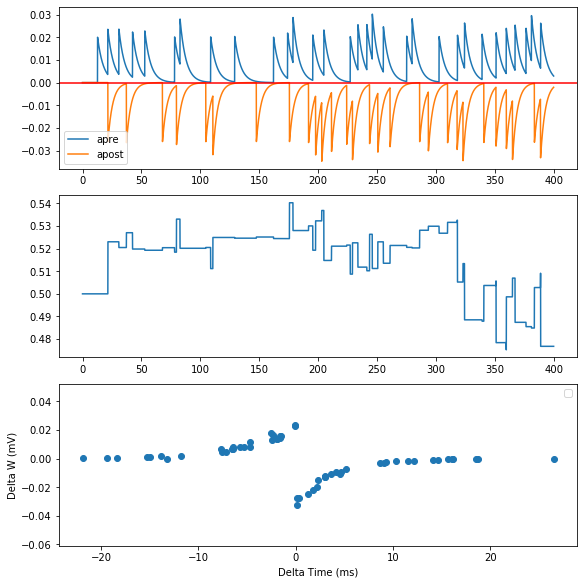

In [118]:
simulate(duration = 400*ms , Resistance_1 = 3 * Mohm , Resistance_2 = 2 * Mohm , I_1 = 10 , I_2 = 9 , initial_w = 0.5 , Apre = 0.02,
            p_1 = 0.6 , p_2 = 0.6 , tau_1 = 5*ms , tau_2 = 4*ms , 
             u_rest_1 = -72 * mV , u_rest_2 = -68 * mV , threshold_1 = -54 * mV , threshold_2 = -55 * mV)

No handles with labels found to put in legend.


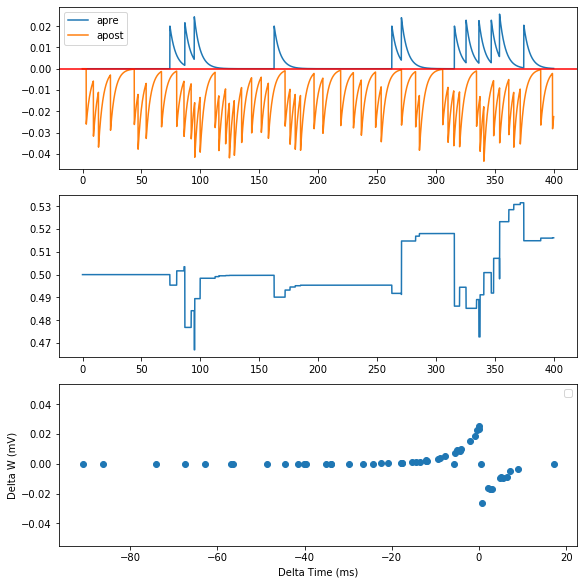

In [119]:
simulate(duration = 400*ms , Resistance_1 = 6 * Mohm , Resistance_2 = 4 * Mohm , I_1 = 4 , I_2 = 6 , initial_w = 0.5 , Apre = 0.02,
            p_1 = 0.6 , p_2 = 0.6 , tau_1 = 5*ms , tau_2 = 4*ms , 
             u_rest_1 = -72 * mV , u_rest_2 = -68 * mV , threshold_1 = -54 * mV , threshold_2 = -55 * mV)

No handles with labels found to put in legend.


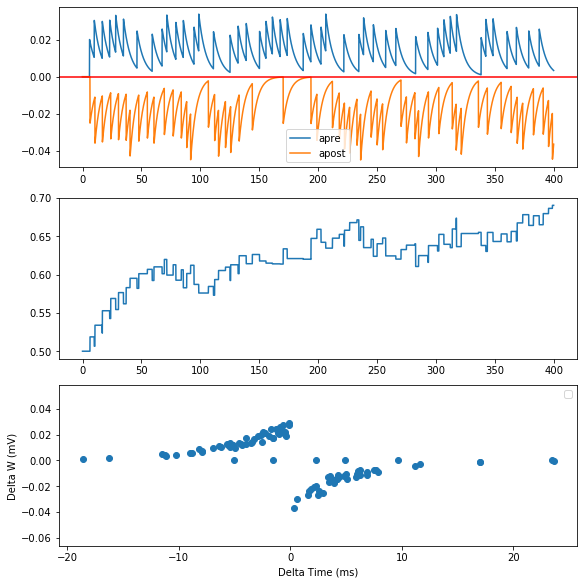

In [126]:
simulate(duration = 400*ms , Resistance_1 = 8 * Mohm , Resistance_2 = 3 * Mohm , I_1 = 6 , I_2 = 7 , initial_w = 0.5 , Apre = 0.02,
            p_1 = 0.6 , p_2 = 0.6 , tau_1 = 6*ms , tau_2 = 5*ms , 
             u_rest_1 = -77 * mV , u_rest_2 = -65 * mV , threshold_1 = -54 * mV , threshold_2 = -55 * mV)

No handles with labels found to put in legend.


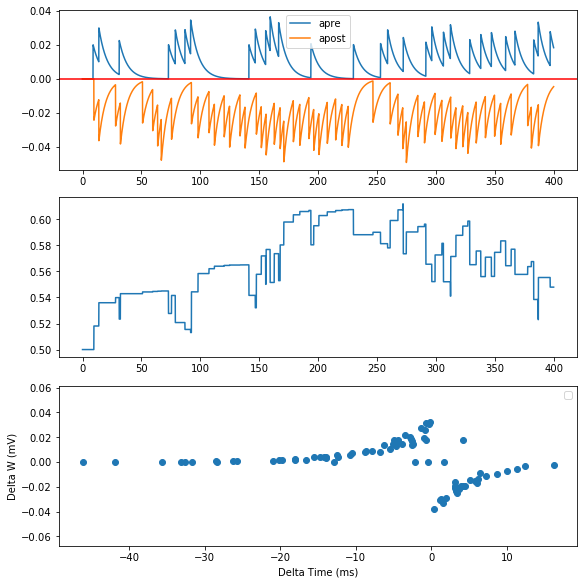

In [127]:
simulate(duration = 400*ms , Resistance_1 = 7 * Mohm , Resistance_2 = 5 * Mohm , I_1 = 8 , I_2 = 5 , initial_w = 0.5 , Apre = 0.02,
            p_1 = 0.4 , p_2 = 0.5 , tau_1 = 7*ms , tau_2 = 6*ms , 
             u_rest_1 = -77 * mV , u_rest_2 = -65 * mV , threshold_1 = -54 * mV , threshold_2 = -55 * mV)